In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()     

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]
single_image.shape

(28, 28)

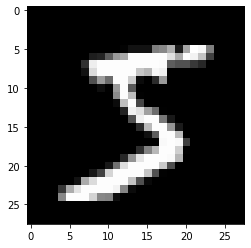

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()

0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

In [17]:
single_image = X_train[500]

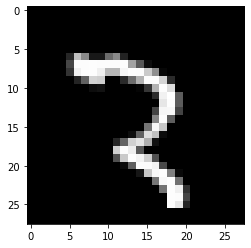

In [18]:
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [22]:
model.compile(loss="categorical_crossentropy", metrics='accuracy',optimizer="adam")

In [23]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 48s 50ms/step - loss: 0.4082 - accuracy: 0.8745 - val_loss: 0.1371 - val_accuracy: 0.9585
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.1242 - accuracy: 0.9632 - val_loss: 0.0927 - val_accuracy: 0.9695
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0922 - accuracy: 0.9720 - val_loss: 0.0678 - val_accuracy: 0.9775
Epoch 4/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0756 - accuracy: 0.9771 - val_loss: 0.0613 - val_accuracy: 0.9796
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0523 - val_accuracy: 0.9831


In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.408159,0.874517,0.137069,0.9585
1,0.124250,0.963233,0.092709,0.9695
2,0.092223,0.972000,0.067810,0.9775
3,0.075576,0.977067,0.061275,0.9796
4,0.064990,0.980350,0.052324,0.9831


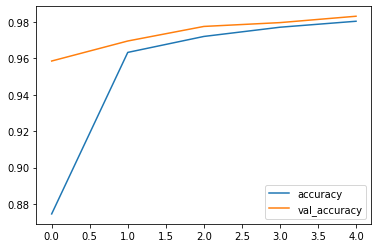

In [26]:
metrics[['accuracy','val_accuracy']].plot()

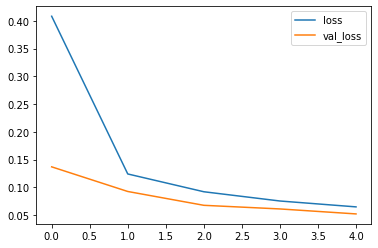

In [27]:
metrics[['loss','val_loss']].plot()

In [28]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [29]:
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

[[ 972    0    2    0    0    2    2    1    1    0]
 [   0 1128    0    1    2    0    0    2    1    1]
 [   2    5 1013    4    1    0    0    7    0    0]
 [   0    0    1  991    0   10    0    5    2    1]
 [   0    1    0    0  974    0    2    2    0    3]
 [   1    0    0    5    0  880    2    1    0    3]
 [   5    5    0    0    5    2  938    0    3    0]
 [   0    4    3    0    0    0    0 1018    1    2]
 [   3    1    2    3    2    6    3    5  941    8]
 [   4    1    0    3    9    4    0   11    1  976]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99   

In [30]:
img = image.load_img('imagefive.jpg')

In [31]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [32]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)
print(x_single_prediction)     

[8]


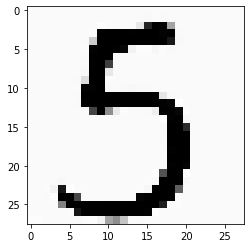

In [33]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [34]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [35]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

In [36]:
print(x_single_prediction)

[5]
